In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats


Matplotlib is building the font cache; this may take a moment.


In [3]:
# Load datasets
kunden_df = pd.read_csv('kunden.csv', sep=';')
besucher_df = pd.read_csv('besucher.csv', sep=';')
geo_df = pd.read_csv('geo.txt', sep='\t')

In [4]:
# Display the first few rows of each dataframe to understand their structure
print(kunden_df.head())
print(besucher_df.head())
print(geo_df.head())

   Alter  Einkommen      Preis  Geschlecht  Zeit KundeNr
0     64    66894.0   88160.31         1.0  43.0   K0310
1     54    77644.0  103145.70         1.0  40.0   K1042
2     55    44341.0   80565.16         0.0  37.0   K0382
3     49    67271.0   83949.89         0.0  42.0   K0498
4     46    49832.0   93781.58         0.0  41.0   K0552
   Alter           Einkommen  Geschlecht  Zeit KundeNr
0     30    39919,0953348874           0  29,0   K1814
1     41   53430,67308587748           0  27,0   K1544
2     64    73163,2169267002           0  32,0   K1945
3     41  36761,482581315344           0  44,0   K1825
4     35   42684,33163178136           1  33,0   K1144
  KundeNr Niederlassung
0   K0001       Sachsen
1   K0002           NRW
2   K0003        Hessen
3   K0004        Bayern
4   K0005        Bayern


In [5]:
# Exercise 1: Wie viele Autos wurden verkauft?
autos_sold = kunden_df.shape[0]
print(f"Anzahl der verkauften Autos: {autos_sold}")

Anzahl der verkauften Autos: 1104


In [6]:
# Exercise 2: Was ist der Höchst-, Mindest- und Durchschnittspreis der verkauften Autos?
max_price = kunden_df['Preis'].max()
min_price = kunden_df['Preis'].min()
avg_price = kunden_df['Preis'].mean()
print(f"Höchstpreis: {max_price}, Mindestpreis: {min_price}, Durchschnittspreis: {avg_price}")

Höchstpreis: 165482.31, Mindestpreis: 21471.65, Durchschnittspreis: 88975.19871376813


In [7]:
# Exercise 3: Wie hoch war der Gesamtumsatz?
total_revenue = kunden_df['Preis'].sum()
print(f"Gesamtumsatz: {total_revenue}")

Gesamtumsatz: 98228619.38000001


In [8]:
# Merge kunden_df and geo_df on KundeNr
merged_df = pd.merge(kunden_df, geo_df, on='KundeNr')

In [12]:
# Exercise 4: Wie viele Autos wurden pro Bundesland verkauft?
autos_per_state = merged_df['Niederlassung'].value_counts()
print("Autos verkauft pro Bundesland:")
print(autos_per_state)

Autos verkauft pro Bundesland:
Niederlassung
Baden-Württemberg        205
Bayern                   188
Nordrhein-Westfalen      172
Berlin                   122
Hessen                    96
Niedersachsen             96
Sachsen                   89
Thüringen                 49
Hamburg                   43
Brandenburg               37
Berlin-Mitte               2
NRW                        2
BERLIN                     1
Düsseldorf                 1
Berlin-Charlottenburg      1
Name: count, dtype: int64


In [18]:
merged_df[merged_df["Niederlassung"] == "Berlin"]

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr,Niederlassung
1,54,77644.0,103145.70,1.0,40.0,K1042,Berlin
11,45,68432.0,82849.76,0.0,39.0,K0071,Berlin
37,43,72619.0,94619.66,1.0,56.0,K0698,Berlin
40,55,63325.0,89117.31,0.0,46.0,K0766,Berlin
52,46,61088.0,117616.31,1.0,48.0,K0622,Berlin
...,...,...,...,...,...,...,...
1083,65,58270.0,85983.74,1.0,38.0,K0475,Berlin
1084,37,57504.0,78406.83,1.0,40.0,K0857,Berlin
1087,50,49026.0,79076.93,0.0,36.0,K0022,Berlin
1093,30,29264.0,54886.03,1.0,21.0,K0344,Berlin


In [14]:
# Exercise 5: Wie hoch war der durchschnittliche Umsatz pro Bundesland?
avg_revenue_per_state = merged_df.groupby('Niederlassung')['Preis'].sum()
print("Durchschnittlicher Umsatz pro Bundesland:")
print(avg_revenue_per_state)


avg_car_revenue_per_state = merged_df.groupby('Niederlassung')['Preis'].mean()
print("Durchschnittlicher Umsatz pro Auto pro Bundesland:")
print(avg_car_revenue_per_state)

Durchschnittlicher Umsatz pro Bundesland:
Niederlassung
BERLIN                      67106.32
Baden-Württemberg        18648759.80
Bayern                   16796730.89
Berlin                   11002626.45
Berlin-Charlottenburg       77410.61
Berlin-Mitte               140564.61
Brandenburg               3206924.71
Düsseldorf                 120215.50
Hamburg                   3678628.46
Hessen                    8243033.23
NRW                        230775.55
Niedersachsen             8444478.00
Nordrhein-Westfalen      15159830.36
Sachsen                   7961502.18
Thüringen                 4450032.71
Name: Preis, dtype: float64
Durchschnittlicher Umsatz pro Auto pro Bundesland:
Niederlassung
BERLIN                    67106.320000
Baden-Württemberg         90969.560000
Bayern                    89344.313245
Berlin                    90185.462705
Berlin-Charlottenburg     77410.610000
Berlin-Mitte              70282.305000
Brandenburg               86673.640811
Düsseldorf             

In [19]:
# Exercise 6: In welchem Bundesland wurde das teuerste Auto verkauft?
state_most_expensive = merged_df.loc[merged_df['Preis'].idxmax()]['Niederlassung']
print(f"Bundesland mit dem teuersten Auto: {state_most_expensive}")

Bundesland mit dem teuersten Auto: Niedersachsen


In [20]:
# Exercise 7: Haben mehr Frauen oder mehr Männer unsere Autos gekauft?
gender_counts = kunden_df['Geschlecht'].value_counts().rename({0: 'Frauen', 1: 'Männer'})
print("Anzahl der verkauften Autos nach Geschlecht:")
print(gender_counts)

Anzahl der verkauften Autos nach Geschlecht:
Geschlecht
Männer    701
Frauen    398
Name: count, dtype: int64


In [21]:
# Exercise 8: Wie hoch ist das Durchschnittsalter unserer Kunden? Wie hoch ist das Durchschnittsalter unserer Besucher?
avg_age_customers = kunden_df['Alter'].mean()
avg_age_visitors = besucher_df['Alter'].mean()
print(f"Durchschnittsalter der Kunden: {avg_age_customers}")
print(f"Durchschnittsalter der Besucher: {avg_age_visitors}")

Durchschnittsalter der Kunden: 50.481884057971016
Durchschnittsalter der Besucher: 49.88103254769921


In [25]:
besucher_df["Einkommen"]

0        39919,0953348874
1       53430,67308587748
2        73163,2169267002
3      36761,482581315344
4       42684,33163178136
              ...        
886     34391,82496545645
887     68516,49543941053
888     89685,33344089528
889     95714,30526812703
890      73319,1870845747
Name: Einkommen, Length: 891, dtype: object

In [22]:
# Exercise 9: Wie hoch ist das Durchschnittseinkommen unserer Kunden? Wie hoch ist das Durchschnittseinkommen unserer Besucher?
avg_income_customers = kunden_df['Einkommen'].mean()
avg_income_visitors = besucher_df['Einkommen'].mean()
print(f"Durchschnittseinkommen der Kunden: {avg_income_customers}")
print(f"Durchschnittseinkommen der Besucher: {avg_income_visitors}")

TypeError: Could not convert string '39919,095334887453430,6730858774873163,216926700236761,48258131534442684,3316317813663881,0341751203768885,0195681823563083,2887052234655256,453046788844873,2445709162675200,5346419925959560,0617798872190643,1330264720680553,3934049614542543,2520462749133126,1104564873962175,9591702697651900,0824815431659967,3132824711433884,9663209832467587,2095415684938844,3351108619966782,6347974994454891,446791097359388,5197458330392892,6441743642636252,2812317110154233,5890228089484876,3032832134360708,2260780098354500,539138070934101,7639731286255260,8475155385171014,3103864477753036,0112840079979728,135107282826637,98144369604448808,0711401661661964,3516491442527594,3932535345383333,5678276530554207,3898103791765585,3900749882639421,70983093856108569,0870206500491624,9973063671667392,4631271769368557,6427270826251083,8259557874352205,0924379564796580,063501161880825,8832185220256999,1265384196864794,7272763158975601,5285554564532469,3524983600751711,71083745210575231,1779216165537428,1175865555975785,7676807702230485,18825307208370853,564544037157516,9025070079366419,2482681253362279,1313336656870297,2135963892565034,9974002025641668,0541064350849480,5782896876456292,7108485582978307,6463537711243614,8826279291776602,788839578858051,9565774294251857,8601665874779291,16181152776105,6344849030668691,1813239968648849,8707902449592223,1891480425385613,2617121279853430,9717507428234560,06117858794546846,6463110687453482,3122003610429395,641448651568282,0461173264266573,4865026049544825,25229829825540638,1238196079875680,856945579139528,4907594774144270,05194794130574005,8090858495643060,34554823505571786,360176188960260,0195030824545165,0414233177698083,3695870348743990,6013992860254965,09103136646453797,0724116021475646,6143461249285750,0755456699149362,3585675795939581,2453043109972005,3562491358964799,9996819009173773,4723882992851990,857265011162840,3745232208846686,4882288500342664,9269334808178027,3335686636954771,8198457615879526,7225832598932281,85753793403631010,6037127238578362,6740613729856457,489136414374860,9857719430168635,7943855614961246,3269774990269114,6667448538576153,0543738378339145,7018075802534526,5702015958761173,9356553709840070,0222319986961411,1070138629976131,4062339216352580,6588118318412031,98925855272374054,7061926749647051,4340986717175169,0829694589853203,2102940435974726,8492489870760309,9595177438356212,0331427840446631,7579029604756491,6544372799346713,4946219478737001,859785810146611,8968138248839625,2172759725597897,050543371868343,4299582890468648,9102107080442021,35120670358478363,181584405167416,1405181769475132,6987142760354277,2024713850483975,4742460708460427,731706794587075,042497664276311,8635225035438298,5336521766735653,8432170780451507,4421341963558161,7645656999838642,917627466656617,2161266690838266,3219929652552447,56023560829663015,2026061103444514,7119246254320924,6879607606377172,347736873368054,5627948079657346,4360335719774487,8894071117454308,4861332293868669,4027437413670603,639647952146191,8789656963766297,5254871318646132,9453508117255240,0510048030678220,5777308457667495,8015217196148519,2659576928644999,0191118990949679,67381295875451504,4271427318957367,4291974924380750,6226110746663456,6265512107345802,0282055596358520,5201325899756254,1969717391677479,7737098792680288,1963371034837936,9796307906450221,9627803685348379,3227669302398029,001225446682388,1590633254769200,6540649563859334,76584226201549472,255388359961480,9812366314154044,9349455766566940,7899958270174982,3095401275862675,6004914174585235,0713348608423109,8805735873655111,173829191574797,7196067787366343,4107815335458484,5403904164688621,2419111218830932,0480316004970306,3491978939949633,9450466292469331,4516571138851799,46469899620651013,2186238329577364,7731212916469519,5708718991552774,2944097010470615,5495091493843354,5018016566889005,3928889026139196,7058967282874550,620255491383198,2424840234245748,4269361856479607,6673545004559352,7806869320555814,7962063131466108,2538552960685175,9183330728154182,11501418170552096,7543408236888482,6824700239883787,0104964529938822,67354027810566000,8580218537533297,7588231424668211,3829872056450176,7849165957148780,1809013514441519,4025308863150243,0431998639626018,93084372962844672,5447522727650981,5333061367670012,5564685703129787,6107396754735350,73456349881660561,809653840758250,25483250298656933,6729590121954872,3409761411385441,9278383964367965,9112314488648300,4901666339286198,6119707072453806,6498654673678842,3849061283486965,5171622110450383,003514633110802,03330723479154815,0629296071560410,8177432236249912,513360723251462,3344965831567482,4916393774359391,90725775828571796,7837506635185476,7500249837294337,5547428518652369,61478657280571786,8696356770139209,650134163450331,8008344877347738,7999288685551230,9426534379464399,1738083959871626,5268847087650926,4893508653266518,3095034024480266,519757084142528,5826493515375258,588275602150005,00264959814435225,2963004701224242,601396169354485,3527129740881926,4985149563351957,0475097071247469,1321018413450640,42393200433455860,3413444150568505,9271581369731654,7093102086354025,60163123257461371,8603742783437067,7818356792262171,3908396261676785,4156578785335558,5229536720620329,57218855501629694,3696721277363156,460792484371024,57732289570533,444073658686403,2945395679767161,1829524307454066,7149027743829204,04582051676759102,5763974619778816,4253960819679027,0831324499466319,9223839453671227,2592497671635916,9508400993844788,12387809838473604,9674698644165216,9804579098558268,3845517022181322,7775562486859034,5027622272854677,3867614701449839,0832314728770483,6791303887986136,1882841227646277,3148234506283377,6437505551938133,96901553641561618,745320750666931,6297455517882714,5994461168649390,7420348030646307,3226209181184130,836112182861255,9919275915564549,90081090938537026,7034500376841986,4751925636763296,6903404803267323,1456444445663084,9506872452484640,630563735581289,881369229644388,7491127241549717,7987293843241206,2346642409772706,6455080408572310,2013738546774192,8625378281340364,8328999075977712,6065977075566068,4797168133278275,2850706902875316,2543606361658982,672413259446195,1531475183269727,4095859418979151,8294239737367881,4016955982552534,5236066745741110,88094347220675807,655948206339443,81609945898564541,8784978108952745,1266422646231232,13741067149783902,9458199315659679,66094835941528689,4722529124159093,1952886511143409,2236305384877682,5644596655234572,6289128806577908,291950874744536,6672823803148650,0375008760152041,4232507201585386,1153657140239956,1188425528470713,5787437029442439,4939067038355541,9567971211462958,23673475424676890,748056439567803,1956984753647052,4113794445570568,6637881550431258,4058978954842954,298457980284321,0289046385960088,4488658232471444,4581007388534255,884277553650532,9465595004379754,3780745899458633,9697638448262351,0864199110272003,3463938286779995,4349069360333793,8466570834179736,8496550030798883,1875736752492374,3238328280992238,9476586813852972,5820146274847024,300556500645176,516494338852713,5586897544443389,666257615279689,6451257300453765,3558545901957703,9663676650973776,4669240958856806,2211972709834204,3152222889785332,2254238104258756,7514548392481435,3018484937263688,0408666337946823,7195073344667276,3839182689470632,1811642414536719,1014865272775021,3480093039165737,3478924608866606,8224021262642036,490788494282889,7304082758855421,1009115752259731,0674275373278072,7739025716791807,0104933379665662,149249340429607,1416049205570410,7980519184863119,2707751420844380,5949332029671443,2188532860566735,6917421513840283,1745189609454140,5954561464836223,9990583976181230,9523736346565786,3655890760959089,7408965293158806,41759373533680798,2933149401738942,8091171878446373,4579824315257149,4980065503652174,7909130380646178,9570827588326418,80124745566755038,2998268580571314,9785974950649527,6648157444553583,8450296796856179,0175739030269210,9834164149528556,8203006105640946,2792887235956452,5031245466966775,555302171841344,51369109592642547,26936443188659341,4472140004754638,6404379826471732,248848321541229,8391518895552868,0893331173374031,3304850473744278,5656700523171794,8389991049878050,8914586599380978,8178064443551056,50852039763464432,7013711678462342,1455413187456363,6911872870972396,2105287111326142,9824798268487205,8980148613565207,4536911106448650,3271614116980403,5975526559868355,7650224095154754,5254496257859447,26279684045667687,3538114830743844,8565817420156874,92742069899445205,4827030205366037,85541797870703,9981930227757455,8915429958978010,0218115702354716,5487413616274173,3747932125656233,7214271006772230,7615623306668751,5714107290381446,362644016763037,6232286609163242,9107511057949453,9610809669346530,3231866514547601,8325045999578663,9353516061875303,5587956793557040,84550173962644138,6566645913850246,0917175833554152,4941711084171511,5780700918832659,5062633290274905,1621581742453575,6071981535734848,44065767516470533,0642266872353267,3936114370153193,8592301811964926,1916782822665102,4011143522164075,2115240502667290,6021633253435323,8800791363463141,81417890914678936,724093616476712,2592805638148523,8597218435541367,8162150657368522,8422586841350054,0744711178264923,246552152257701,1854462178625073,6689005108759813,59131711470455752,8024309499735492,7932027671375983,2237616080157964,5121542556838361,7858396006767445,3793576989140291,7565833956234928,93148659869695449,8994418566644854,0247896197174006,4052104230292235,9109267905281957,2149184029531912,96328237923100322,3662757317456853,8957697103433579,0745316596150242,7571506275858522,3028843556135620,9150804485768324,6960973664764786,5537070723845043,60772921704572200,3076595223461880,0043236941997121,1406338837691036,0799247078855437,4493498244867947,5054865537167645,3289348804571199,2503455310431569,14469448067850681,6869444264342755,0563167294561876,05385740533577392,4524394834231305,7514262456276359,2110117944258008,72010957650541923,3651502796937291,9750856833380850,5411270334224167,81395810144747676,3950382055840081,0170088419284772,4808473176221238,0254222539353423,9106871748755265,1337423536279612,0931424172641616,5729801087354906,984111543867953,5050342532354069,6260983046668239,8150665974847801,2520152280654451,3892268716872872,4098406508977933,0834538192939742,2641433262446968,1133413367784204,7067282071764971,4004464065425293,0853632047557289,9031494611953602,4789668880270856,6543645156365988,5203802744743123,9009232608241050,1592044138361112,0558326796679595,0213297767676115,948107534929634,42399468047762738,7812647590694379,2725499737467920,2342716462239083,35969871613677272,1723279112562488,35119408220659582,219084003364084,61327118557550717,28709642680655,2683321213149160,7785672612268336,1997781008549653,3945700393872358,4290705395167182,0473707806250353,63442331448307,1019401478228227,6184974183571174,3842700982559150,9407651763940098,9793094488661744,0068530806664640,8082852431257581,1165543852171947,5133524693557751,7722712528659483,1737051816382507,0028929563677623,5645032220655165,4848308186870843,405721976168875,2234637104468566,2854726630954737,6850145001584266,9056113817868475,4794703542147805,4991173752968468,3975623385661399,9378246226980040,1608527999962517,5085363721265103,6643159606972026,0501372407638912,2294614346539505,5171783321633126,9154573925360794,3554407127658019,16624743614454638,1121082320369123,4111512856669613,5273128626149444,3699516313850762,7476326393841453,3674686126351809,9294543994656413,9822690006371829,7573177484364683,27352359109560883,5034781668582205,1438400221147045,7338379770484746,7934437057143538,4623485025172995,7285326861970707,7398700474948260,2921755094376155,6720394612626846,5421521498876138,0050781340166691,2668110799435044,69854570844555621,0163741435467687,5703015250270848,8665533635579245,2174266381958431,4859181450274594,0536526191444635,6791942766149170,3800266698678649,1114068963843375,7536412326668126,65252183755445,9530577551579203,8269973923559913,3465648246251488,13439804577553219,9743936183750945,5174937320952765,7586573541353443,3052689479931856,0788979533249585,9884404416463443,3680599624449634,2289862542331802,09087014406452544,5478637058134124,059583231658746,8319797450350643,7385276231663231,821624042645507,9944487700185251,9999095786350013,89049202797543526,3886479129559572,9855677878762382,8617304811559163,8236811880973917,2495170245563048,0059999067254319,9201426676345342,4488798165568579,7378211781360901,0390979394565433,9846865353864092,3158093156774220,5823223758956608,267192776478517,6126957053249709,4064929807936992,2789549579267550,845818844866602,0010469619248822,831218867450251,1794234027244087,5825207356484659,6946380147346151,0901365550356023,5748173757553592,0126837332546292,6482164961653493,2224512363291,3603472329874418,1768286726380098,8434800850422706,33368751000780694,1350360263969354,0390855279337661,6929642579370657,9027382278482209,902899089367813,5335324410469862,1989602755668849,4216207554664187,7740213503863241,9038425839281205,210666952648307,8833350635951201,0141412050660020,8761676246251392,4992636771875570,0152354051274947,0088285930365983,0340824648680806,378564303460135,6206065539270449,0909246850487311,647966289243966,8216510091450404,68347191762637308,8698327980877750,9476160752145047,5509567347433066,5187288261457893,55051433085563515,355757042477583,356467715541843,1546773181440182,20977478909558432,85437686818577161,3822505614847188,8881202630349550,9677676590630096,8390367738948971,4172492753535264,28526960841651429,7867778161373148,2521021844369768,6633173670366328,1364774851166260,026128050250109,8272508526657509,9650852257669209,4500442805181521,7614429799760350,9769080264353357,5327883171461601,8387047567465956,2191452724245591,2072453108543655,9301703753256316,9333228288884969,4049964078343724,7228821296565999,3811626928253630,87295681477681611,7453892751143358,5643496734754508,6853904119968187,6446874803456717,5876057648440996,1123906524961880,0005605435972700,3150927063178633,9728448401467710,176146778754688,4840851136949200,6224530505937696,6254151011771635,4438975242559961,7857377984338375,7813843082651044,0925433370454037,31003089226665112,4306898431969099,9437972477977311,973920633434180,6807783187466521,7767302981534322,4547416662739509,388619856255845,1205272505678156,4662191130247150,7736732003726466,43959405156840776,0231447137465588,4035829633860418,9671878439145567,3006180340935272,92656417144570647,1688492759677462,1262006421254229,9658981133642931,6656318812544077,9593462365552892,2448931921165676,4686573688849271,1509324953260312,34494103386549469,8331183100849675,8838089582860048,6189040662986000,2204338351385349,5927271477855437,1439553479174660,1326422229963300,06646482592667502,3722161622641373,8510596583741160,41027852172689744,9946799954870988,447290683462735,4567839681284240,3180371013664231,46375368906655129,6560856884859104,5130137270473522,0082296036146979,78700835755450082,2327516189661221,7811376583674592,7995473585686843,3377908180872725,1896872494731562,6467739975444541,6977752459761848,472240335564184,2908365315741970,7554464163647827,7237165964841292,540235563234391,8249654564568516,4954394105389685,3334408952895714,3052681270373319,1870845747' to numeric

In [26]:
# Exercise 10: Statistically significant difference in income
t_stat, p_value = stats.ttest_ind(kunden_df['Einkommen'], besucher_df['Einkommen'])
print(f"T-statistic: {t_stat}, P-value: {p_value}")

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [27]:
# Exercise 11: Pearson correlation between variables
correlation_matrix = kunden_df[['Alter', 'Einkommen', 'Preis', 'Zeit']].corr()
print("Korrelation zwischen Alter, Einkommen, Preis und Zeit:")
print(correlation_matrix)

Korrelation zwischen Alter, Einkommen, Preis und Zeit:
              Alter  Einkommen     Preis      Zeit
Alter      1.000000   0.043574  0.770675  0.585900
Einkommen  0.043574   1.000000 -0.001685  0.021593
Preis      0.770675  -0.001685  1.000000  0.707778
Zeit       0.585900   0.021593  0.707778  1.000000


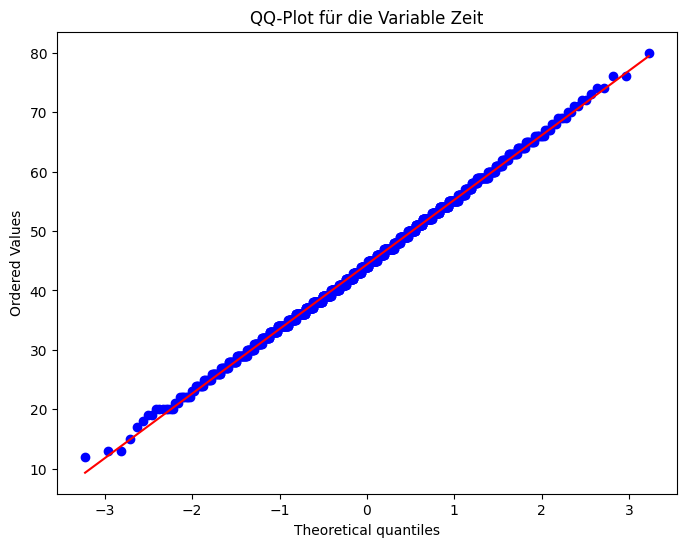

In [28]:
# Exercise 12: QQ-Plot for normality of 'Zeit'
plt.figure(figsize=(8, 6))
stats.probplot(kunden_df['Zeit'], dist="norm", plot=plt)
plt.title("QQ-Plot für die Variable Zeit")
plt.show()

In [29]:
# Exercise 13: Kunden ohne Bankkredit
no_credit_customers = kunden_df[kunden_df['Einkommen'] > kunden_df['Preis']].shape[0]
print(f"Anzahl der Kunden ohne Bankkredit: {no_credit_customers}")

Anzahl der Kunden ohne Bankkredit: 6


In [30]:
# Exercise 14: Regression to determine factors affecting price
X = kunden_df[['Alter', 'Einkommen', 'Geschlecht']]
y = kunden_df['Preis']
X = sm.add_ constant(X)  # Add constant term for intercept
model = sm.OLS(y, X).fit()
print(model.summary())

MissingDataError: exog contains inf or nans

In [ ]:
# Exercise 15: Predicting price for specific customers
# For 32-year-old male with 30,000 Euro income
new_customer_1 = pd.DataFrame({'const': [1], 'Alter': [32], 'Einkommen': [30000], 'Geschlecht': [1]})
predicted_price_1 = model.predict(new_customer_1)

# For 51-year-old male with 54,000 Euro income
new_customer_2 = pd.DataFrame({'const': [1], 'Alter': [51], 'Einkommen': [54000], 'Geschlecht': [1]})
predicted_price_2 = model.predict(new_customer_2)

print(f"Prognostizierter Kaufpreis für 32-jährigen Kunden: {predicted_price_1.iloc[0]}")
print(f"Prognostizierter Kaufpreis für 51-jährigen Kunden: {predicted_price_2.iloc[0]}")

In [ ]:
# Exercise 16: Standardized regression coefficients
standardized_X = (X - X.mean()) / X.std()
standardized_model = sm.OLS(y, standardized_X).fit()
print(standardized_model.summary())

In [ ]:
# Exercise 17: Logistic regression for purchase probability
# Add a binary target variable 'Kauf' to besucher_df where 1 indicates purchase
besucher_df['Kauf'] = besucher_df['KundeNr'].isin(kunden_df['KundeNr']).astype(int)
X_logit = besucher_df[['Alter', 'Einkommen', 'Zeit', 'Geschlecht']]
y_logit = besucher_df['Kauf']
X_logit = sm.add_constant(X_logit)
logit_model = sm.Logit(y_logit, X_logit).fit()
print(logit_model.summary())

In [ ]:
# Exercise 18: Purchase probability for specific visitors
# For 32-year-old male with 30,000 Euro income and 30 minutes test time
new_visitor_1 = pd.DataFrame({'const': [1], 'Alter': [32], 'Einkommen': [30000], 'Zeit': [30], 'Geschlecht': [1]})
purchase_prob_1 = logit_model.predict(new_visitor_1)

# For 51-year-old male with 54,000 Euro income and 45 minutes test time
new_visitor_2 = pd.DataFrame({'const': [1], 'Alter': [51], 'Einkommen': [54000], 'Zeit': [45], 'Geschlecht': [1]})
purchase_prob_2 = logit_model.predict(new_visitor_2)

print(f"Wahrscheinlichkeit des Kaufs für 32-jährigen Besucher: {purchase_prob_1.iloc[0]}")
print(f"Wahrscheinlichkeit des Kaufs für 51-jährigen Besucher: {purchase_prob_2.iloc[0]}")